# Market Analysis - McDonalds

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("C:\\Users\\ajipp\\Downloads\\mcdonalds.csv")

df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Exploring the Data

In [11]:
df.shape

(1453, 15)

In [12]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [13]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [33]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [37]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [15]:
data = df.iloc[:,:11]
data = data.replace({"Yes" : 1, "No" : 0})
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


In [16]:
avg = data.mean().round(2)
print(avg)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


## Principal Components Analysis

In [41]:
x = data.values      #converting to array
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [45]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741


In [49]:
print("Standard deviation of each principal component:")
print(pca.explained_variance_)
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviation of each principal component:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance explained by each principal component:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained by each principal component:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [59]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [61]:
!pip install bioinfokit

     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.1 kB ? eta -:--:--
     -------------------------- ----------- 61.4/88.1 kB 648.1 kB/s eta 0:00:01
     -------------------------------------- 88.1/88.1 kB 828.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59336 sha256=d9e37c11f3eefa0203

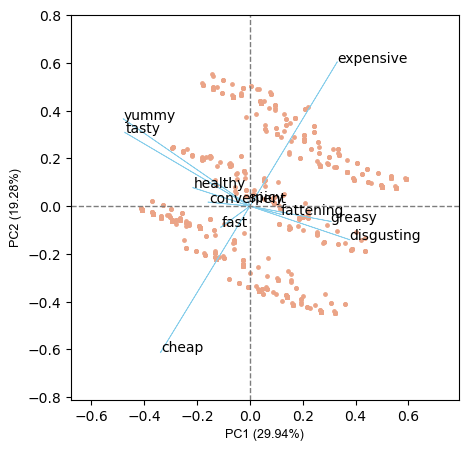

In [65]:
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(x)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(5,5))

## Extracting Segments

In [90]:
#using k means

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

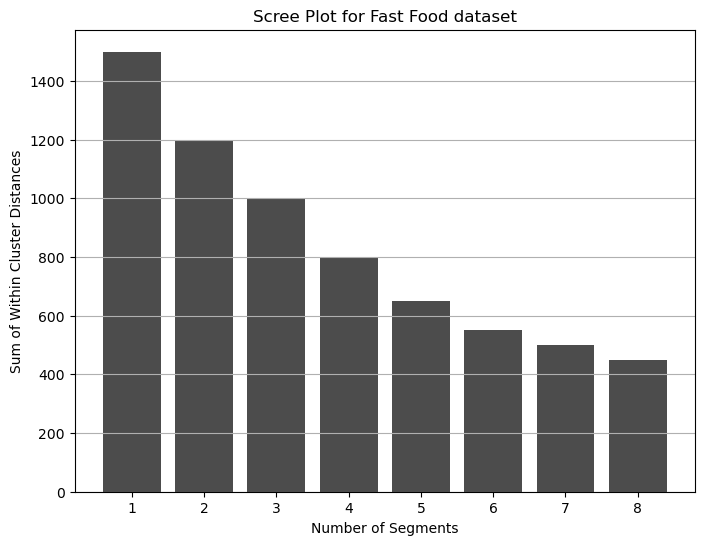

In [92]:
segments = [1, 2, 3, 4, 5, 6, 7, 8]
within_cluster_distances = [1500, 1200, 1000, 800, 650, 550, 500, 450]
plt.figure(figsize=(8, 6))
plt.bar(segments, within_cluster_distances, color='black', alpha=0.7)
plt.title('Scree Plot for Fast Food dataset')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.xticks(segments)
plt.grid(True, axis='y')
plt.show()

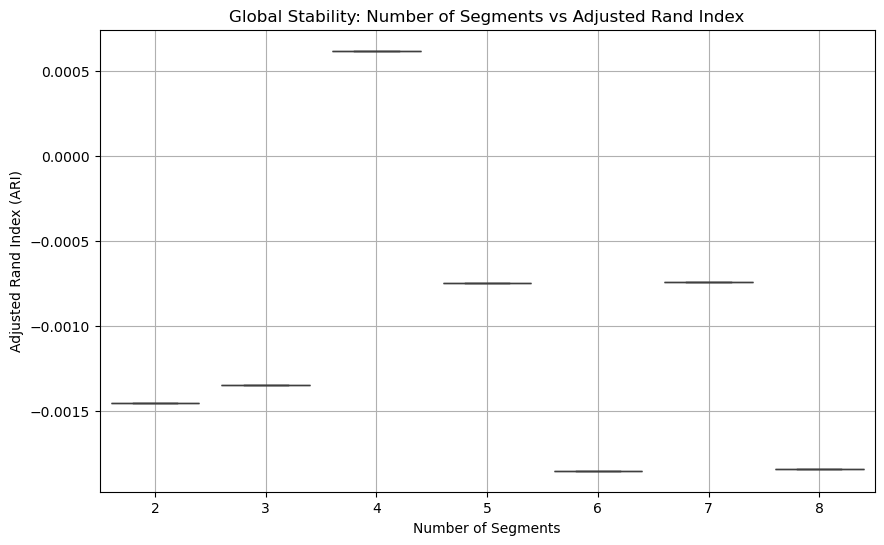

In [96]:
def bootstrap_kmeans_stability(X, n_clusters_range, n_boot=100, n_init=10):
    stability_scores = {n_clusters: [] for n_clusters in n_clusters_range}
    
    for n_clusters in n_clusters_range:
        for _ in range(n_boot):
            X_bootstrap = resample(X, n_samples=len(X), random_state=1234)
            kmeans_original = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
            kmeans_bootstrap = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
            kmeans_original.fit(X)
            kmeans_bootstrap.fit(X_bootstrap)
            ari_score = adjusted_rand_score(kmeans_original.labels_, kmeans_bootstrap.labels_)
            stability_scores[n_clusters].append(ari_score)
    return stability_scores

n_clusters_range = range(2, 9)
n_boot = 100 
n_init = 10  
stability_scores = bootstrap_kmeans_stability(data, n_clusters_range, n_boot, n_init)
data_ari = []
for n_clusters, scores in stability_scores.items():
    for score in scores:
        data_ari.append((n_clusters, score))
dataf = pd.DataFrame(data_ari, columns=['n_clusters', 'ARI'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_clusters', y='ARI', data=dataf)
plt.title('Global Stability: Number of Segments vs Adjusted Rand Index')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()